In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer
from sklearn.linear_model import Perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv


# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, add, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from skimage import io
import matplotlib.pyplot as plt, numpy as np

from tensorflow.keras.utils import image_dataset_from_directory

from skimage import io, transform, color, exposure, img_as_float
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:

def calculations(cm_test,classes):



  cal_d_test = {}
  for i in range(len(classes)):
    cal_d_test[classes[i]] = []
    TP = cm_test[i][i]
    FN = 0
    FP = 0
    TN = 0

    for j in cm_test[i]:
      FN+=j
    FN = FN - TP
  
    for j in range(len(classes)):
      FP += cm_test[j][i]
    FP = FP - TP

    for x in range(len(classes)):
      for y in range(len(classes)):
        TN += cm_test[x][y]
    TN = TN - TP - FN - FP


    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    ppv = TP/(TP+FP)
    npv = TN/(TN+FN)
    f1 = 2*(ppv*sensitivity)/(ppv+sensitivity)
    cal_d_test[classes[i]].append(sensitivity)
    cal_d_test[classes[i]].append(specificity)
    cal_d_test[classes[i]].append(ppv)
    cal_d_test[classes[i]].append(npv)
    cal_d_test[classes[i]].append(f1)

  return cal_d_test

In [11]:

cancer_patient = pd.read_csv('/content/cancer patient data sets.csv.csv')
cancer_patient.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

In [13]:
len(cancer_patient)

1000

In [14]:
cancer_patient.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [15]:
cancer_patient.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


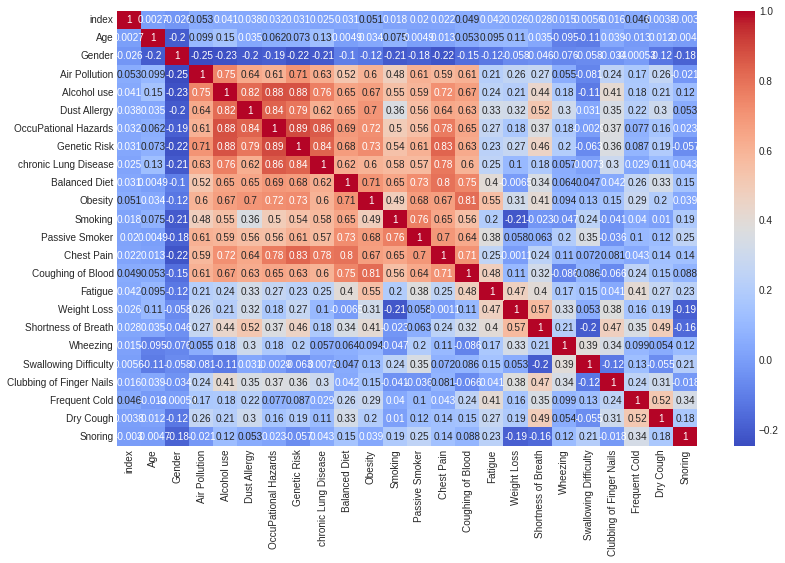

In [16]:
fig = plt.figure(figsize = (13,8))
sns.heatmap(cancer_patient.corr(),cmap='coolwarm',annot=True);


Age                        AxesSubplot(0.125,0.749828;0.227941x0.130172)
Gender                  AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Air Pollution           AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Alcohol use                AxesSubplot(0.125,0.593621;0.227941x0.130172)
Dust Allergy            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
OccuPational Hazards    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Genetic Risk               AxesSubplot(0.125,0.437414;0.227941x0.130172)
chronic Lung Disease    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Balanced Diet           AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Obesity                    AxesSubplot(0.125,0.281207;0.227941x0.130172)
Smoking                 AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Passive Smoker          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Chest Pain                    AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

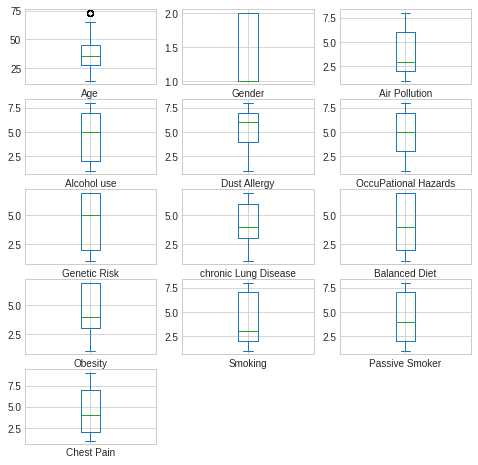

In [17]:
box=["Age","Gender","Air Pollution","Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","chronic Lung Disease","Balanced Diet",
    "Obesity","Smoking","Passive Smoker","Chest Pain"]
cancer_patient[box].plot(kind="box", subplots="True" , layout=(5, 3) ,figsize=(8,8))

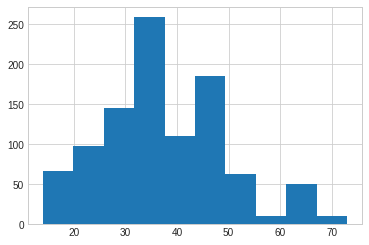

In [18]:
fig, ax = plt.subplots()
hist = ax.hist(x = cancer_patient["Age"]);

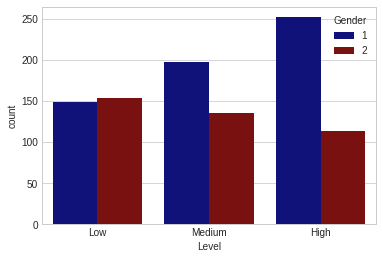

In [19]:
#Required outside of function. This needs to be activated first when plotting in every code block
fig, ax = plt.subplots()

#Count plot
plot = sns.countplot(data = cancer_patient, x='Level', hue='Gender', palette=['darkblue','darkred'])

In [20]:
cancer_patient.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [21]:
cancer_over50 = cancer_patient[cancer_patient["Age"] > 50]
cancer_over50.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
11,11,P108,64,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
15,15,P111,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,Medium
21,21,P117,53,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
22,22,P118,62,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


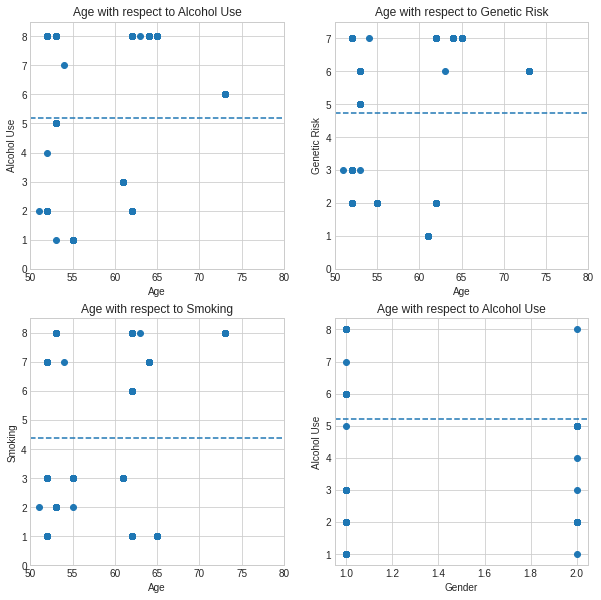

In [22]:
# Making Subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols= 2, figsize=(10, 10))

# Adding Data to the plot
scatter = ax1.scatter(x = cancer_over50["Age"], y = cancer_over50["Alcohol use"], cmap = "winter")

# For Plot ax1
ax1.set(title = "Age with respect to Alcohol Use", 
        xlabel = "Age", 
        ylabel = "Alcohol Use")
ax1.axhline(cancer_over50["Alcohol use"].mean(),
           linestyle = "--");
ax1.set_xlim([50, 80])
ax1.set_ylim([0, 8.5])

# For Plot ax2
scatter = ax2.scatter(x = cancer_over50["Age"], y = cancer_over50["Genetic Risk"])
ax2.set(title = "Age with respect to Genetic Risk", xlabel = "Age", ylabel = "Genetic Risk")
ax2.axhline(cancer_over50["Genetic Risk"].mean(),
           linestyle = "--");
ax2.set_xlim([50, 80])
ax2.set_ylim([0, 7.5])

# For Plot ax3
scatter = ax3.scatter(x = cancer_over50["Age"], y = cancer_over50["Smoking"])
ax3.set(title = "Age with respect to Smoking", xlabel = "Age", ylabel = "Smoking")
ax3.axhline(cancer_over50["Smoking"].mean(),
           linestyle = "--");
ax3.set_xlim([50, 80])
ax3.set_ylim([0, 8.5])

# For Plot ax4
scatter = ax4.scatter(x = cancer_over50["Gender"], y = cancer_over50["Alcohol use"])
ax4.set(title = "Age with respect to Alcohol Use", xlabel = "Gender", ylabel = "Alcohol Use")
ax4.axhline(cancer_over50["Alcohol use"].mean(),
           linestyle = "--");

In [23]:
cancer_over50.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
11,11,P108,64,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
15,15,P111,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,Medium
21,21,P117,53,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
22,22,P118,62,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [24]:
cancer_patient.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

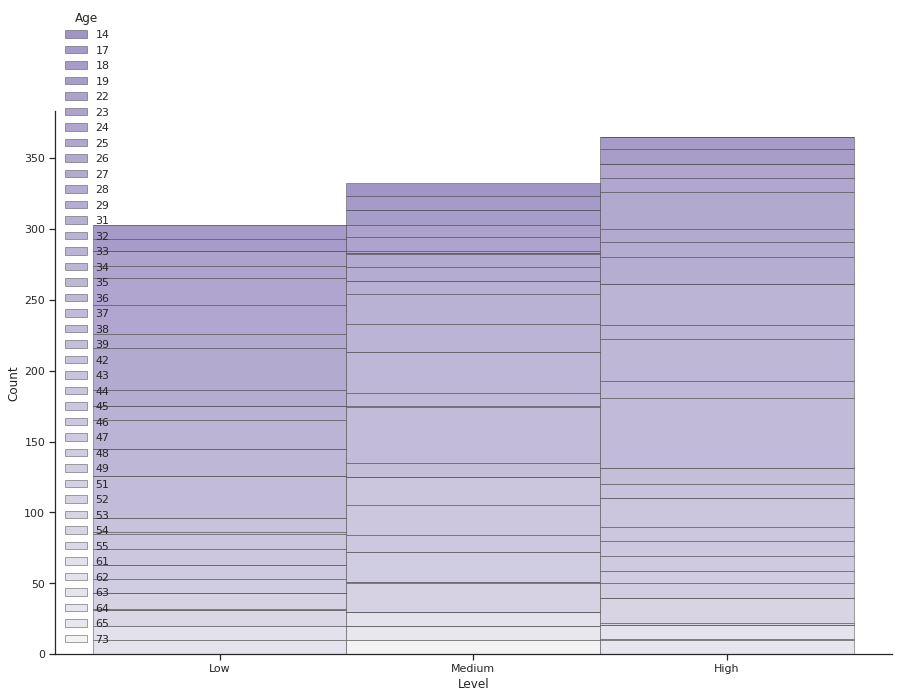

In [25]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (15,10))
sns.despine(f)
sns.histplot(
    cancer_patient, x= "Level", hue = "Age",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.5"
)

In [26]:
cancer_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [27]:
cancer_patient["Level"].replace(["Low", "Medium", "High"], ["0", "1", "2"], inplace=True)

In [28]:
cancer_patient["Level"] = cancer_patient["Level"].astype(int)

In [29]:
cancer_patient.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     5 non-null      int64 
 1   Patient Id                5 non-null      object
 2   Age                       5 non-null      int64 
 3   Gender                    5 non-null      int64 
 4   Air Pollution             5 non-null      int64 
 5   Alcohol use               5 non-null      int64 
 6   Dust Allergy              5 non-null      int64 
 7   OccuPational Hazards      5 non-null      int64 
 8   Genetic Risk              5 non-null      int64 
 9   chronic Lung Disease      5 non-null      int64 
 10  Balanced Diet             5 non-null      int64 
 11  Obesity                   5 non-null      int64 
 12  Smoking                   5 non-null      int64 
 13  Passive Smoker            5 non-null      int64 
 14  Chest Pain                5 no

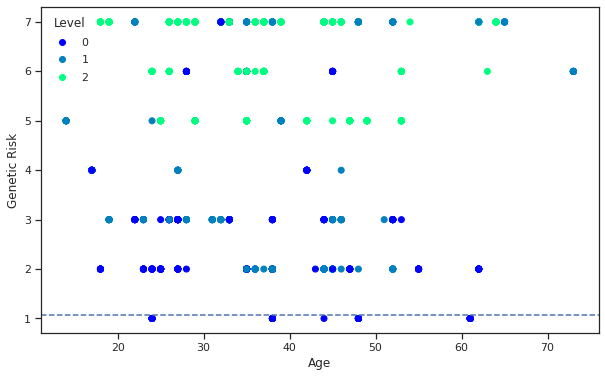

In [30]:
fig, ax = plt.subplots(figsize = (10, 6));

scatter = ax.scatter(x = cancer_patient["Age"], 
                     y = cancer_patient["Genetic Risk"],
                     c = cancer_patient["Level"],
                     cmap = "winter")

ax.set(xlabel = "Age", 
       ylabel = "Genetic Risk");

ax.legend(*scatter.legend_elements(), title = "Level");

ax.axhline(cancer_patient["Level"].mean(),
           linestyle = "--");

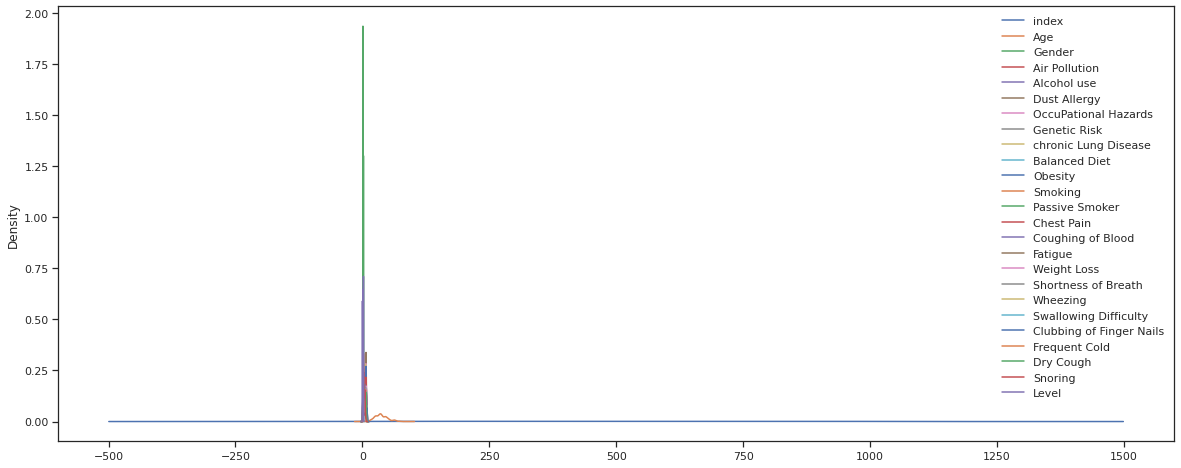

In [31]:
cancer_patient.plot.kde(figsize = (20,8));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80a368bd00>,
      dtype=object)

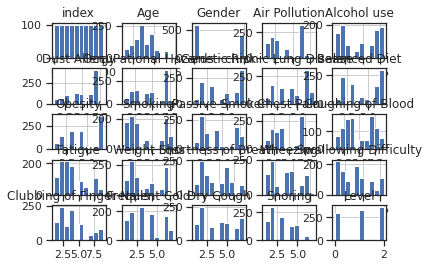

In [32]:
cancer_patient.hist()

In [33]:
np.array([cancer_patient["Gender"][:10]])

array([[1, 1, 1, 1, 1, 1, 2, 2, 2, 1]])

In [34]:
male = 0
female = 0
for i in cancer_patient["Gender"]:
    if i == 1:
        male += 1
    elif i == 2:
        female += 1
f"Number of Male: {male}, Number of females: {female}"

'Number of Male: 598, Number of females: 402'

In [35]:
# Make a histogram here
cancer_patient_male = cancer_patient[cancer_patient["Gender"] == 1]
cancer_patient_male.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


In [36]:
cancer_patient_female = cancer_patient[cancer_patient["Gender"] == 2]
cancer_patient_female.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,0
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,1
11,11,P108,64,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,2
12,12,P109,39,2,4,5,6,6,5,4,...,5,3,2,4,3,1,7,5,6,1


In [37]:
len(cancer_patient_male), len(cancer_patient_female)

(598, 402)

In [38]:
cancer_patient.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


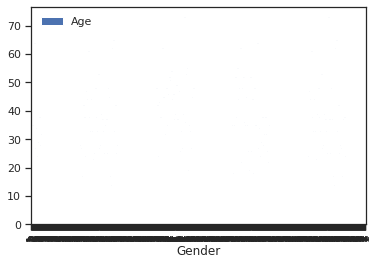

In [39]:
fig, ax = plt.subplots()
cancer_patient.plot(kind = "bar", x = "Gender", y = "Age", ax = ax);

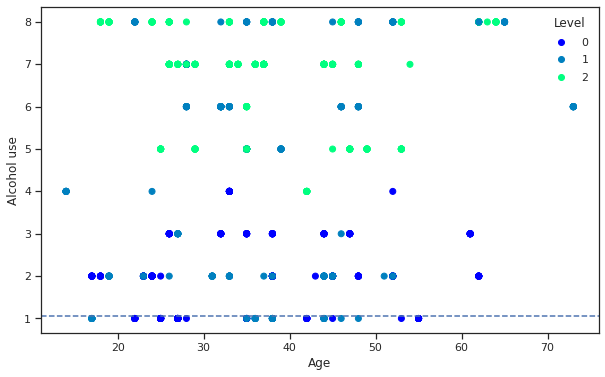

In [40]:
fig, ax = plt.subplots(figsize = (10, 6))
scatter = ax.scatter(x = cancer_patient["Age"], 
                     y = cancer_patient["Alcohol use"], 
                     c = cancer_patient["Level"], 
                     cmap = "winter")

ax.set(xlabel = "Age", 
       ylabel = "Alcohol use");

ax.legend(*scatter.legend_elements(), title = "Level");

ax.axhline(cancer_patient["Level"].mean(),
           linestyle = "--");

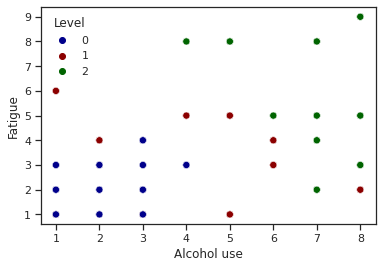

In [41]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Alcohol use',
                     y='Fatigue', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot

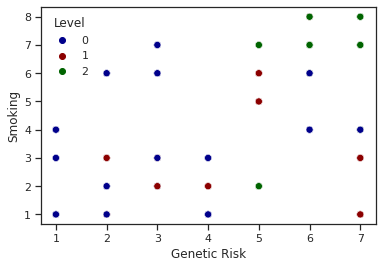

In [42]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.scatterplot(data=cancer_patient, 
                     x='Genetic Risk',
                     y='Smoking', 
                     hue='Level', 
                     palette=['darkblue','darkred','darkgreen'], 
                     s=50, 
                     marker='o')#Count plot

In [43]:
cancer_patient.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


In [44]:
cancer_patient.drop(["Patient Id"], axis = 1, inplace= True)


In [46]:
cancer_patient.drop(["index"], axis = 1, inplace= True)

In [49]:
print(cancer_patient.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [50]:
cancer_patient.drop(['Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Passive Smoker',
       'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Snoring'], axis = 1, inplace= True)

In [51]:
print(cancer_patient.columns)

Index(['Age', 'Gender', 'Genetic Risk', 'Smoking', 'Chest Pain',
       'Coughing of Blood', 'Dry Cough', 'Level'],
      dtype='object')


In [52]:
cancer_patient.head()

,Age,Gender,Genetic Risk,Smoking,Chest Pain,Coughing of Blood,Dry Cough,Level
0,33,1,3,3,2,4,3,0
1,17,1,4,2,2,3,7,1
2,35,1,5,2,4,8,7,2
3,37,1,6,7,7,8,7,2
4,46,1,7,8,7,9,2,2


# knn

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
y_pred = knn .predict(X_test)

In [55]:
from joblib import dump

In [59]:
dump(knn,'/content/savedModel/knn.joblib')

['/content/savedModel/knn.joblib']

In [54]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Low       1.00      0.98      0.99        54
      Medium       0.99      1.00      0.99        70
        High       1.00      1.00      1.00        76

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



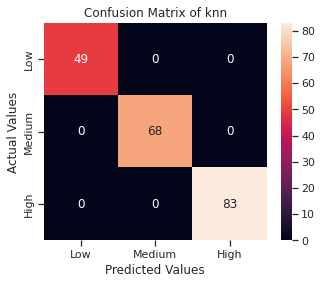

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_true)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of knn')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)
y_pred = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        59
      Medium       1.00      1.00      1.00        60
        High       1.00      1.00      1.00        81

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



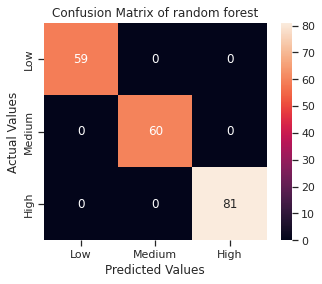

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_true)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of random forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# linear classification

In [ ]:
x=cancer_patient[["Air Pollution","Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","Balanced Diet","Coughing of Blood",
    "Obesity","Smoking","Passive Smoker","Fatigue","Clubbing of Finger Nails","Dry Cough"
       ,"Snoring","Age","Wheezing","Swallowing Difficulty"]]
y=cancer_patient[['Level']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import Perceptron
classifier = Perceptron(random_state=0)   #linear classifier
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.825


In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Low       1.00      0.57      0.72        67
      Medium       0.72      0.90      0.80        58
        High       0.83      1.00      0.91        75

    accuracy                           0.82       200
   macro avg       0.85      0.82      0.81       200
weighted avg       0.86      0.82      0.82       200



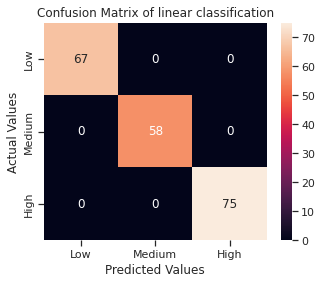

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_true)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of linear classification')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# svm


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X = cancer_patient.drop(["Level"], axis = 1)
y = cancer_patient["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 2)
sv = svm.SVC()
sv.fit(X_train, y_train)
acc_sv = sv.score(X_test, y_test)
y_pred = sv .predict(X_test)
print(acc_sv)

0.355


In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ["Low", "Medium", "High"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        60
      Medium       0.00      0.00      0.00        69
        High       0.35      1.00      0.52        71

    accuracy                           0.36       200
   macro avg       0.12      0.33      0.17       200
weighted avg       0.13      0.35      0.19       200



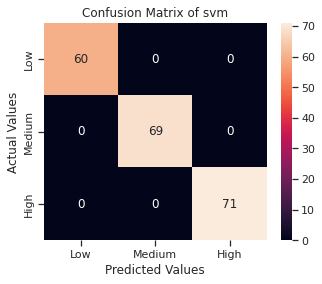

In [ ]:
cls = ["Low", "Medium", "High"]
cm_model = confusion_matrix(y_test, y_true)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of svm')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()